 Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### This code reads an Iris dataset from a CSV file hosted on GitHub, extracts the features (X) and labels (y) from the dataset, and displays the first five rows of the dataset.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')
X = dataset.iloc[:,:4].values
y = dataset['species'].values
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### This code imports the `StandardScaler` class from `sklearn.preprocessing`, creates an instance of it named `sc`, and then scales the features of the training set (`X_train`) and test set (`X_test`) using the `fit_transform()` and `transform()` methods, respectively. This scaling process standardizes the features by removing the mean and scaling to unit variance, which can be beneficial for certain machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### This code imports the Gaussian Naive Bayes classifier from scikit-learn, creates an instance of it named `classifier`, and then trains the classifier using the training data (`X_train` and `y_train`) using the `fit()` method. This prepares the classifier to make predictions based on the features (`X_train`) and corresponding labels (`y_train`).

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Gaussian Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features follow a Gaussian (normal) distribution and calculates the probability of a class given the feature values. It's efficient and works well with continuous data but assumes independence between features.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9333333333333333


array([[12,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  6]])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array(['setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,setosa,setosa
1,setosa,setosa
2,versicolor,versicolor
3,virginica,virginica
4,virginica,virginica
5,versicolor,versicolor
6,versicolor,versicolor
7,virginica,virginica
8,virginica,versicolor
9,setosa,setosa


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Real Values').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Predicted Values').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted Values'].value_counts()
    for x_label, grp in df.groupby('Real Values')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Real Values')
_ = plt.ylabel('Predicted Values')

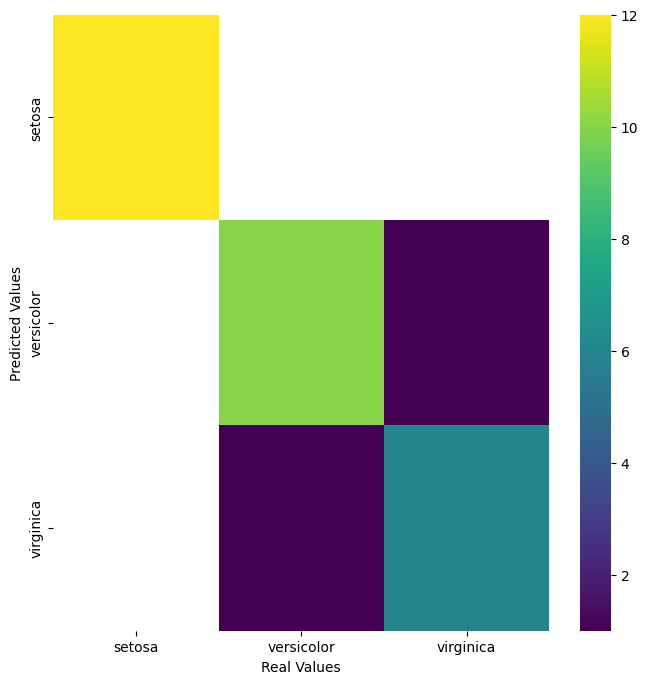

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted Values'].value_counts()
    for x_label, grp in df.groupby('Real Values')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Real Values')
_ = plt.ylabel('Predicted Values')